
# Fundamental Python - Visualization
This tutorial is based on Russ Poldrack's [PythonForRUsers](https://github.com/poldrack/PythonForRUsers) tutorials and is adpated to a Python-only tutorial by Shao-Fang Wang (2020).  

Many people have contributed to developing and revising the R tutorial material (which is what this Python tutorial is based on) over the years: 
Anna Khazenzon, Cayce Hook, Paul Thibodeau, Mike Frank, Benoit Monin, Ewart Thomas, Michael Waskom, Steph Gagnon, Dan Birman, Natalia Velez, Kara Weisman, Andrew Lampinen, Joshua Morris, Yochai Shavit, Jackie Schwartz, Arielle Keller, and Leili Mortazavi.   

## Why visualize data?
The greatest value of a picture is when it forces us to notice what we never expected to see. — John Tukey    

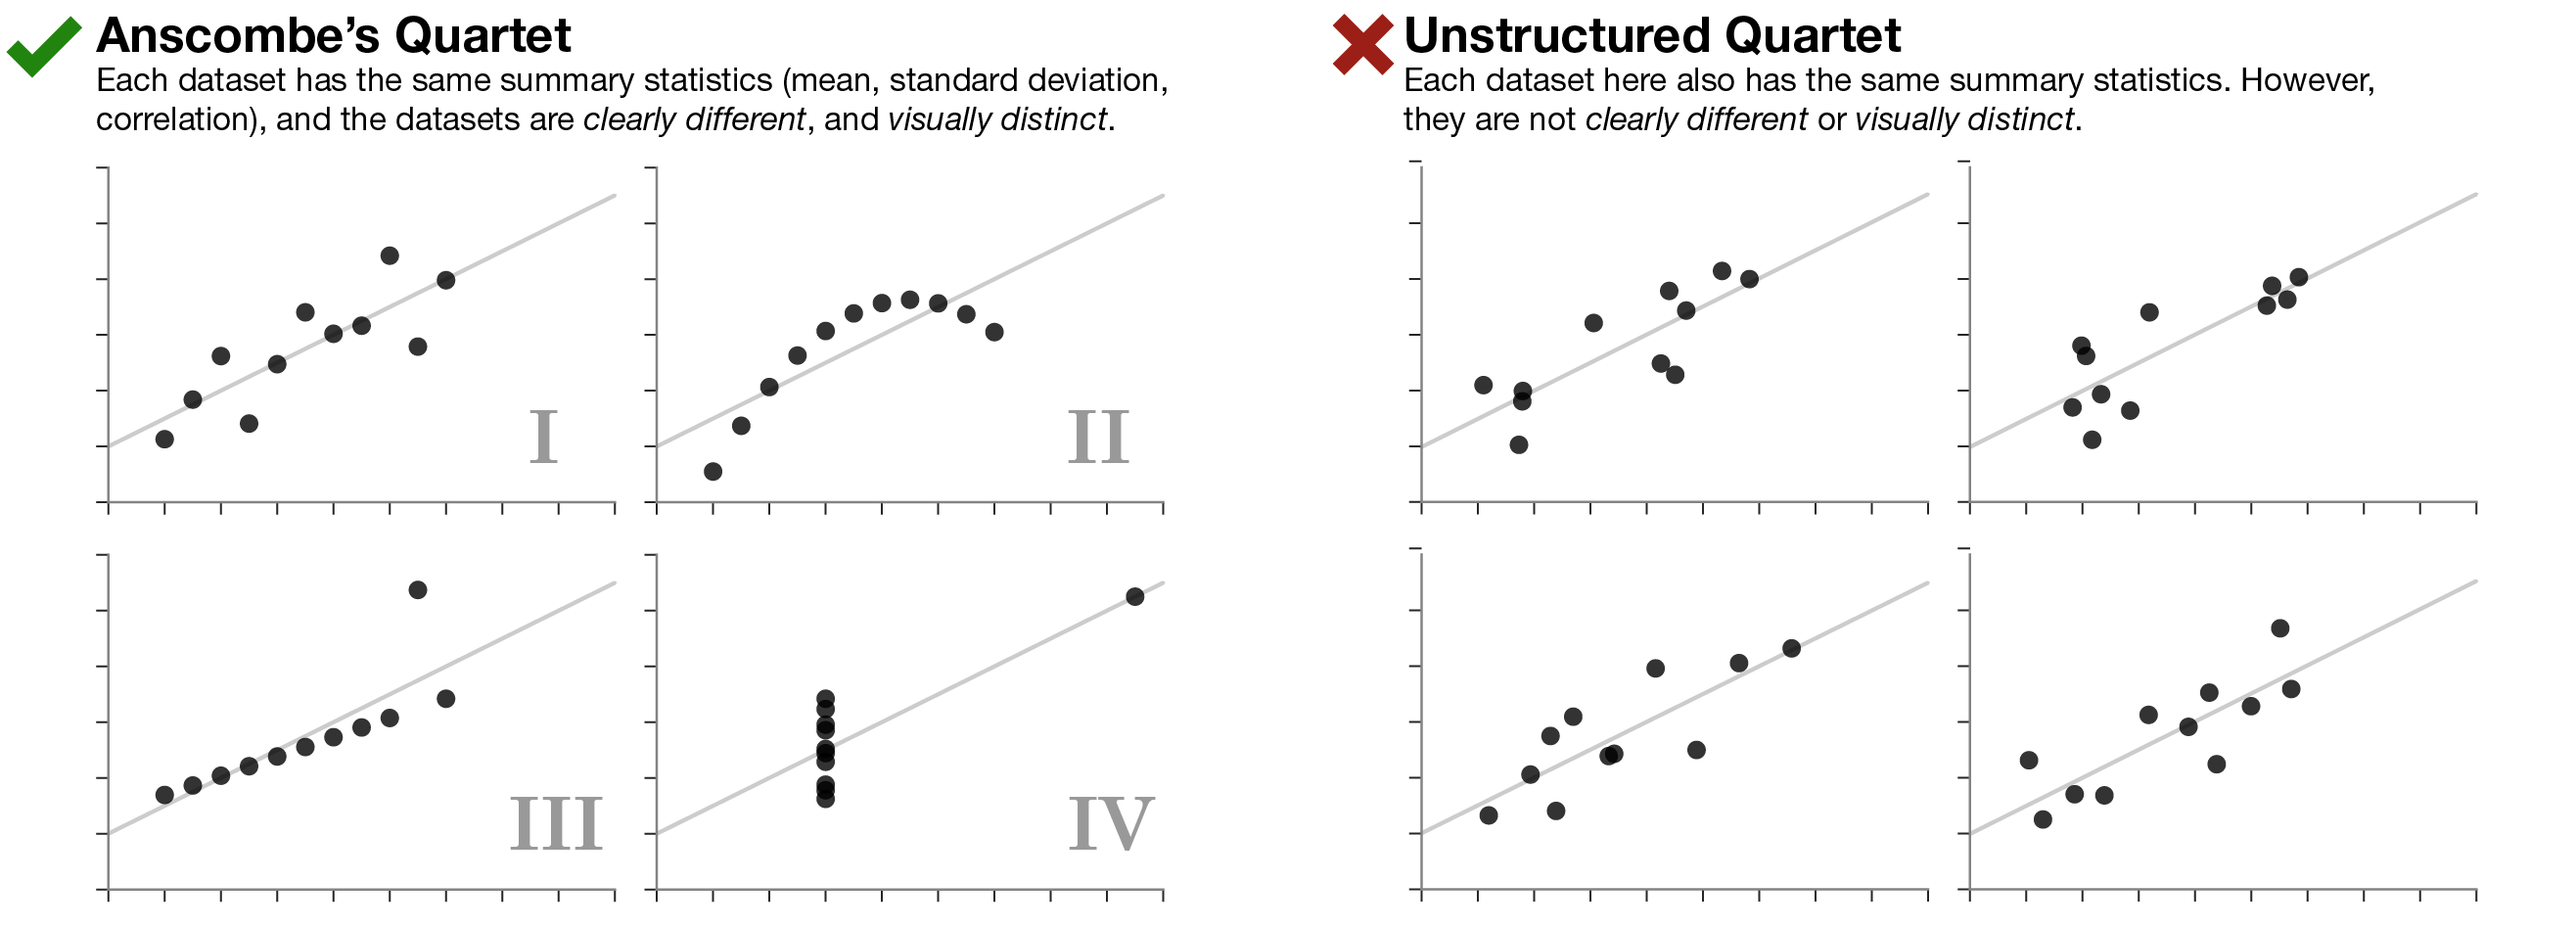

In [1]:
from IPython.display import Image
Image(filename='./figures/anscombe.png') 

Anscombe’s quartet in the figure below (left side) illustrates the importance of visualizing data. Even though the datasets I-IV have the same summary statistics (mean, standard deviation, correlation), they are importantly different from each other. On the right side, we have four data sets with the same summary statistics that are very similar to each other.

We will use Python's and [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/index.html) libraries for plotting. Seaborn is a library for making statistical graphics in Python. It is built on top of ```matplotlib``` and closely integrated with ```pandas``` data structures. Let's import the libraries!

In [2]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("TkAgg")
import seaborn
import pandas
import numpy

# this is necessary to fix a bad interaction on Mac systems
# per: https://github.com/openai/spinningup/issues/16
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

First let's load the UH2 data files and merge them.

In [3]:
data = pandas.read_csv('./data/meaningful_variables_clean.csv', index_col=0)
demogdata = pandas.read_csv('./data/demographics.csv', index_col=0)
mean_results = pandas.read_csv('./data/arrest_ssrt_impulsivity.csv', index_col=0)
df = data.join(
    demogdata, how='inner').join(
        mean_results, how='inner').dropna(
            subset=['ArrestedChargedLifeCount',
                   'TrafficTicketsLastYearCount'])
df.head()

,adaptive_n_back.hddm_drift,adaptive_n_back.hddm_drift_load,adaptive_n_back.hddm_non_decision,adaptive_n_back.hddm_thresh,adaptive_n_back.mean_load.logTr,angling_risk_task_always_sunny.keep_adjusted_clicks,angling_risk_task_always_sunny.keep_coef_of_variation,angling_risk_task_always_sunny.release_adjusted_clicks,angling_risk_task_always_sunny.release_coef_of_variation.logTr,attention_network_task.alerting_hddm_drift,...,CaffieneOtherSourcesDayMG,GamblingProblem,TrafficTicketsLastYearCount,TrafficAccidentsLifeCount,ArrestedChargedLifeCount,MotivationForParticipation,MotivationOther,mean_impulsivity,mean_SSRT,EverArrested
s004,2.065906,-0.507549,0.037627,2.385402,0.854415,13.464286,2.937398,8.928571,1.181606,-0.485213,...,0.0,0.0,0.0,0.0,0.0,money,NaN,1.911021,200.211691,False
s005,3.221946,-1.235354,0.285800,1.580276,0.500775,36.363636,13.145868,30.500000,2.453175,-0.238605,...,0.0,1.0,0.0,3.0,5.0,money,NaN,2.088186,271.213365,True
s009,3.097061,-0.548677,0.229902,1.342728,0.993252,28.260870,5.136477,19.130435,1.589222,-0.277945,...,0.0,0.0,0.0,0.0,0.0,money,NaN,2.961991,159.057108,False
s011,1.635203,-0.056899,0.092145,1.503473,1.163151,40.555556,4.161762,18.333333,1.746829,-0.519528,...,160.0,0.0,0.0,0.0,0.0,money,NaN,2.060847,176.495160,False
s012,2.564846,-0.355632,0.244235,2.410489,1.178655,44.157895,6.148741,24.565217,2.145789,-0.575932,...,200.0,0.0,0.0,2.0,0.0,money,NaN,2.275128,237.863131,False


## Scatter plots

First let's create a scatter plot showing mean SSRT versus mean impulsivity scores. 

We can use `.scatterplot` in Seaborn: x,y- input data variables. We can pass data directly or reference columns in data.

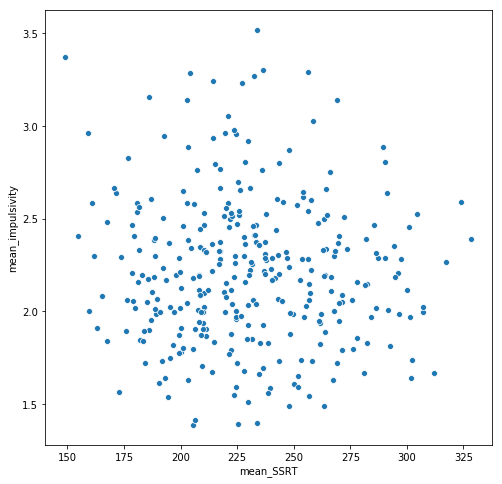

In [4]:
plt.figure(figsize=(8,8))#define figure size
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         data=df)


Now let's say that you want to generate a version of this plot that colors the points by whether the person has ever been arrested or not, and plot the size as the number of times arrested. In Seaborn we would do this using the ```hue``` and ```size``` arguments:

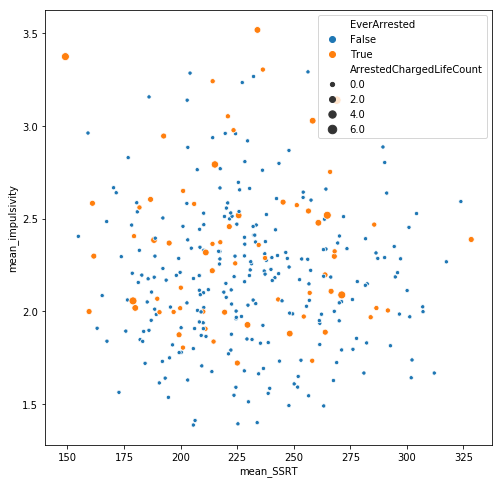

In [5]:
plt.figure(figsize=(8,8))
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         hue='EverArrested',
                         size='ArrestedChargedLifeCount',
                         data=df)


Finally, we may want to change the x and y axis label and add a title to the plot. We will use ```.set()```:

[Text(0, 0.5, 'Mean SSRT'),
 Text(0.5, 0, 'Mean Impulsivity'),
 Text(0.5, 1.0, 'Impulsitivty and SSRT')]

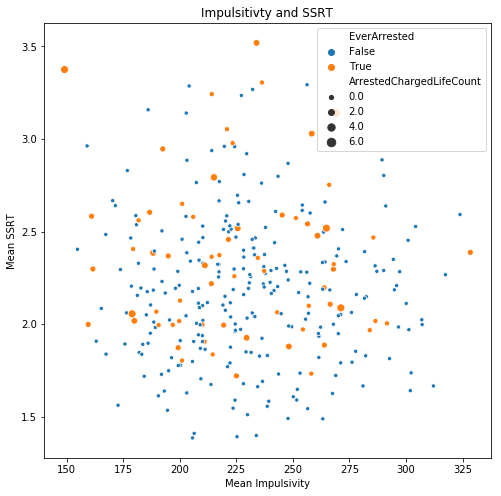

In [6]:
plt.figure(figsize=(8,8))
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         hue='EverArrested',
                         size='ArrestedChargedLifeCount',
                         data=df)
ax.set(xlabel='Mean Impulsivity', ylabel='Mean SSRT', title = "Impulsitivty and SSRT")

We can also change the aesthetic style of the plots by adding `set_style()`. This will affect things like color of the axes, whether a grad is enable by default, and other aesthetic elements.

[Text(0, 0.5, 'Mean SSRT'),
 Text(0.5, 0, 'Mean Impulsivity'),
 Text(0.5, 1.0, 'Impulsitivty and SSRT')]

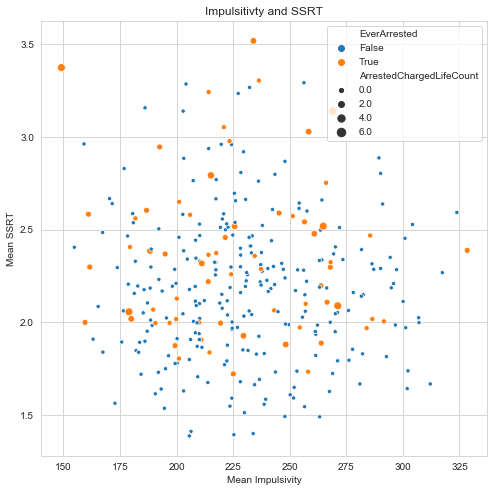

In [7]:
plt.figure(figsize=(8,8))
seaborn.set_style('whitegrid')#here we use the tyle 'whitegrid'
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         hue='EverArrested',
                         size='ArrestedChargedLifeCount',
                         data=df)
ax.set(xlabel='Mean Impulsivity', ylabel='Mean SSRT', title = "Impulsitivty and SSRT")

[Text(0, 0.5, 'Mean SSRT'),
 Text(0.5, 0, 'Mean Impulsivity'),
 Text(0.5, 1.0, 'Impulsitivty and SSRT')]

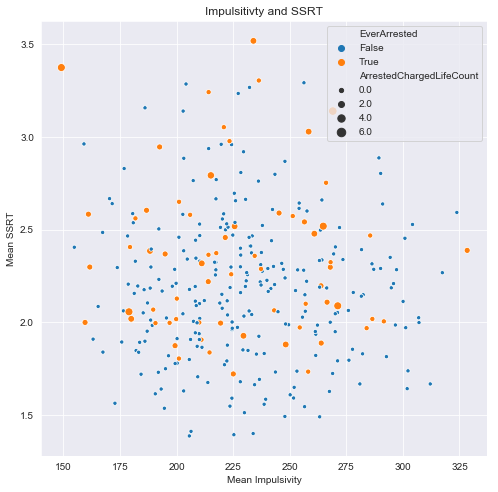

In [8]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')#here we use the tyle 'darkgrid'
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         hue='EverArrested',
                         size='ArrestedChargedLifeCount',
                         data=df)
ax.set(xlabel='Mean Impulsivity', ylabel='Mean SSRT', title = "Impulsitivty and SSRT")

To explore more themes: https://python-graph-gallery.com/104-seaborn-themes/

## Visualizing categorical variables
For quantitative data, we can use box plots to compare data distribution between variables or across levels of a categorical variable. We can use `.boxplot()` to plot mean impulsivity for each of the groups in motivation for participation:

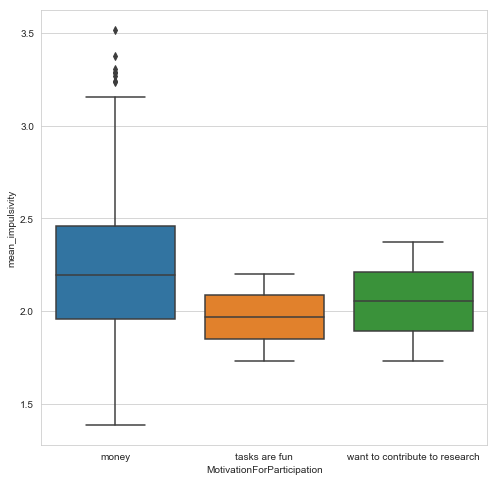

In [9]:
plt.figure(figsize=(8,8))
seaborn.set_style("whitegrid")
seaborn.boxplot(x='MotivationForParticipation',
                y='mean_impulsivity',
                data = df)

Another way to visualize quantitative data is to use bar graph (```.barplot()```). Here, the error bar is 95% cinfidence interval.

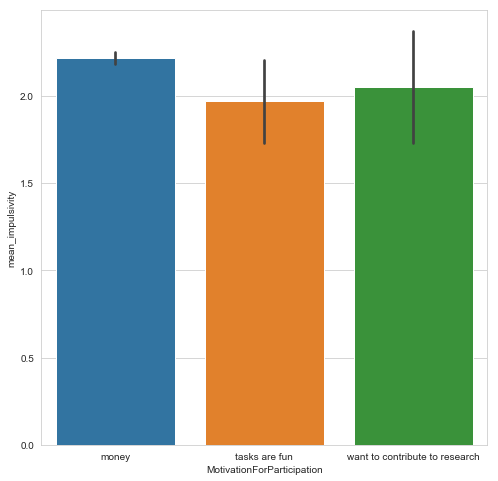

In [10]:
plt.figure(figsize=(8,8))
seaborn.set_style("whitegrid")
seaborn.barplot(x='MotivationForParticipation',
                y='mean_impulsivity',
                n_boot=100,
                ci = 95,
                data = df)

In [11]:
##Apply your knowledge
#Plot mean impulsivity for each group in the gambling problem using boxplot and barplot








##Answer:
# plt.figure(figsize=(8,8))
# seaborn.set_style("whitegrid")
# seaborn.boxplot(x='GamblingProblem',y='mean_impulsivity',data = df).set_title('Boxpllt')

## Visualizing libear relationships

TTwo main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, ```regplot()``` and ```lmplot()``` are closely related, and share much of their core functionality. It is important to understand the ways they differ so that you can quickly choose the correct tool for particular job.



It appears that there is a realtionship between impulsivity and arrests (and in fact our earlier analyses of these data also showed that). We can use ```lmplot()``` to draw a scatterplot of two variables and then fit the regression model y~x and plot the resulting regression line and a 95% confidence interval for that regression:

<Figure size 576x576 with 0 Axes>

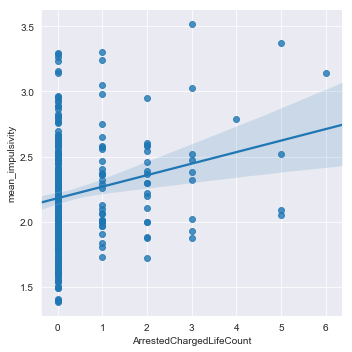

In [12]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.lmplot(x='ArrestedChargedLifeCount',
                    y='mean_impulsivity',
                    data=df)


Here we can see that when x is discrete values, the data points overlap with one another. To visualize the data points better, one option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

<Figure size 576x576 with 0 Axes>

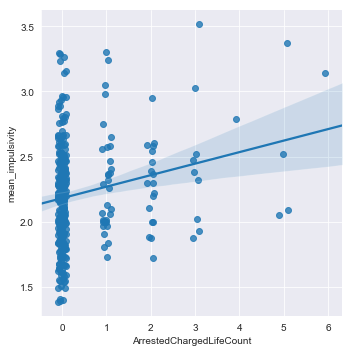

In [13]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.lmplot(x='ArrestedChargedLifeCount',
                    y='mean_impulsivity',
                    x_jitter = 0.1,
                    data=df)


Sometimes, the relationship between variables is non-linear:

In [14]:
df_poly=pandas.DataFrame()
df_poly['x']=numpy.random.randint(1,100,size = 300)
df_poly['y']=numpy.random.randint(10,40,size = 300)
df_poly['z']=df_poly['x']**2*df_poly['y']
df_poly.head()

,x,y,z
0,55,32,96800
1,66,18,78408
2,9,31,2511
3,87,14,105966
4,89,19,150499


<Figure size 576x576 with 0 Axes>

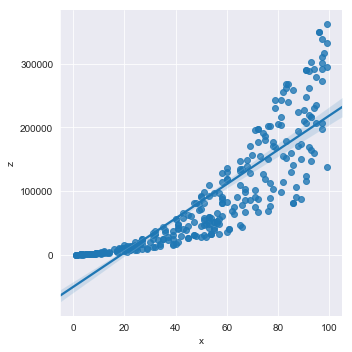

In [15]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.lmplot(x='x',
                    y='z',
                    data=df_poly)


<Figure size 576x576 with 0 Axes>

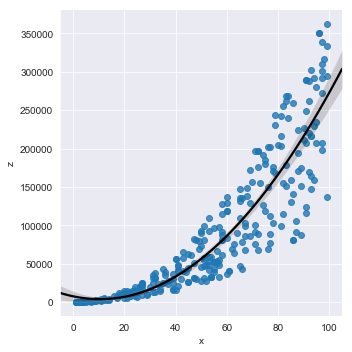

In [16]:
#we can use order to estimate a polynomial regression
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.lmplot(x='x',
                    y='z',
                    order = 2,
                    line_kws={'color': 'black'},#change the color of the line
                    data=df_poly)


## Resources
Seaborn styles: http://seaborn.pydata.org/tutorial/aesthetics.html